In [1]:
from manim import *
import jupyter_capture_output

video_scene = " -v WARNING --progress_bar None --disable_caching coriolis_Scene"
image_scene = f" -v WARNING --progress_bar None --disable_caching -r {2*427},{2*240}  -s coriolis_Scene"

Manim Community v0.17.3

Jupyter Capture Output v0.0.11


In [2]:
def rk4_step(t, delta_t, y_array, ode, params):
    k1 = np.zeros_like(y_array)
    k2 = np.zeros_like(y_array)
    k3 = np.zeros_like(y_array)
    k4 = np.zeros_like(y_array)
    support = np.zeros_like(y_array)
    ode(t, y_array, k1, params) 

    # Berechnung k1 = f(t, y) * dt und support = y + k1/2
    k1 *= delta_t
    support = y_array + k1 / 2

    # Berechnung k2 = f(t+dt/2, y+k1/2) * dt und support = y + k2/2
    ode(t+delta_t/2, support, k2, params)
    k2 *= delta_t
    support = y_array + k2 / 2

    # Berechnung k3 = f(t+dt/2, y+k2/2) * dt und support = y + k3
    ode(t+delta_t/2, support, k3, params)
    k3 *= delta_t
    support = y_array + k3

    # Berechnung k4 = f(t+dt, y+k2) * dt und y_(i+1)
    ode(t+delta_t, support, k4, params)
    k4 *= delta_t
    y_array += (k1 + 2*k2 + 2*k3 + k4) / 6; 
    return


# parameters
x0 = -5             # x-position of low center
x1 = 5              # x-position of high center
k = 1               # field strength
omega = 1           # earths rotation lol
smoothing_factor = 1e-10


def air_pressure(pos):
    left_low = 1 / (np.sqrt((pos[0]-x0)**2 + pos[1]**2) + smoothing_factor)
    right_high = 1 / (np.sqrt((pos[0]-x1)**2 + pos[1]**2) + smoothing_factor)


# force field resulting from air pressure difference
def force_air_pressure(pos): 
    #pos[1] = pos[1] * 4
    force_left_low = -k * ( 1 / (np.sqrt((pos[0]-x0)**2 + pos[1]**2) + smoothing_factor) ) * ((pos[0]-x0) * RIGHT + pos[1] * UP )
    force_right_high = k * ( 1 / (np.sqrt((pos[0]-x1)**2 + pos[1]**2) + smoothing_factor) ) * ((pos[0]-x1) * RIGHT + pos[1] * UP )
    return force_left_low + force_right_high


def DE_air(t, air_state, f_air_state, params):
    v_x = air_state[2]
    v_y = air_state[3]

    f_air_state[0] = v_x
    f_air_state[1] = v_y

    #f_air_state[2] = 


In [25]:
class PressureField(Mobject):
    def __init__(self, center = np.array([0, 0, 0]), low_center = np.array([-5, 0, 0]), high_center = np.array([5, 0, 0]), low = -5, high = 5, **kwargs):
        super().__init__(**kwargs)

        # parameters
        self.low = low
        self.high = high

        npla = NumberPlane(x_axis_config = {"stroke_opacity": 0.215, "stroke_color": BLACK}, y_axis_config = {"stroke_opacity": 0.125, "stroke_color": BLACK}, background_line_style = {"stroke_opacity": 0.125})
        self.add(npla)

        low_L = Text('L', color = BLUE).move_to(low_center)
        high_H = Text('H', color = RED).move_to(high_center)
        self.add(high_H, low_L)


    # scalar funcion returning air prssure
    def pressure(self, offset):
        def parametric_pressure_function(x, y):
            pos = (x, y)
            pressure_low = self.low / (np.sqrt((pos[0]-x0)**2 + pos[1]**2) + smoothing_factor)
            pressure_high = self.high / (np.sqrt((pos[0]-x1)**2 + pos[1]**2) + smoothing_factor)
            return pressure_low + pressure_high + offset
        return parametric_pressure_function
    

    # returns x isobars
    def get_isobars(self, isobaric_density = 10):
        isobar_group = VGroup()
        for i in range(isobaric_density+1):
            offset = self.low + i * (self.high - self.low) / isobaric_density
            isobar_low = ImplicitFunction(self.pressure(offset), color = BLUE, stroke_width = 2, stroke_opacity = i/isobaric_density)
            isobar_high = ImplicitFunction(self.pressure(offset), color = RED, stroke_width = 2, stroke_opacity = 1 - i/isobaric_density)
            isobar_group.add(isobar_low, isobar_high)
        return isobar_group
    

    def get_force(self, omega):
        return 0

Output saved by creating file at animations/coriolis/coriolis_air.mp4.


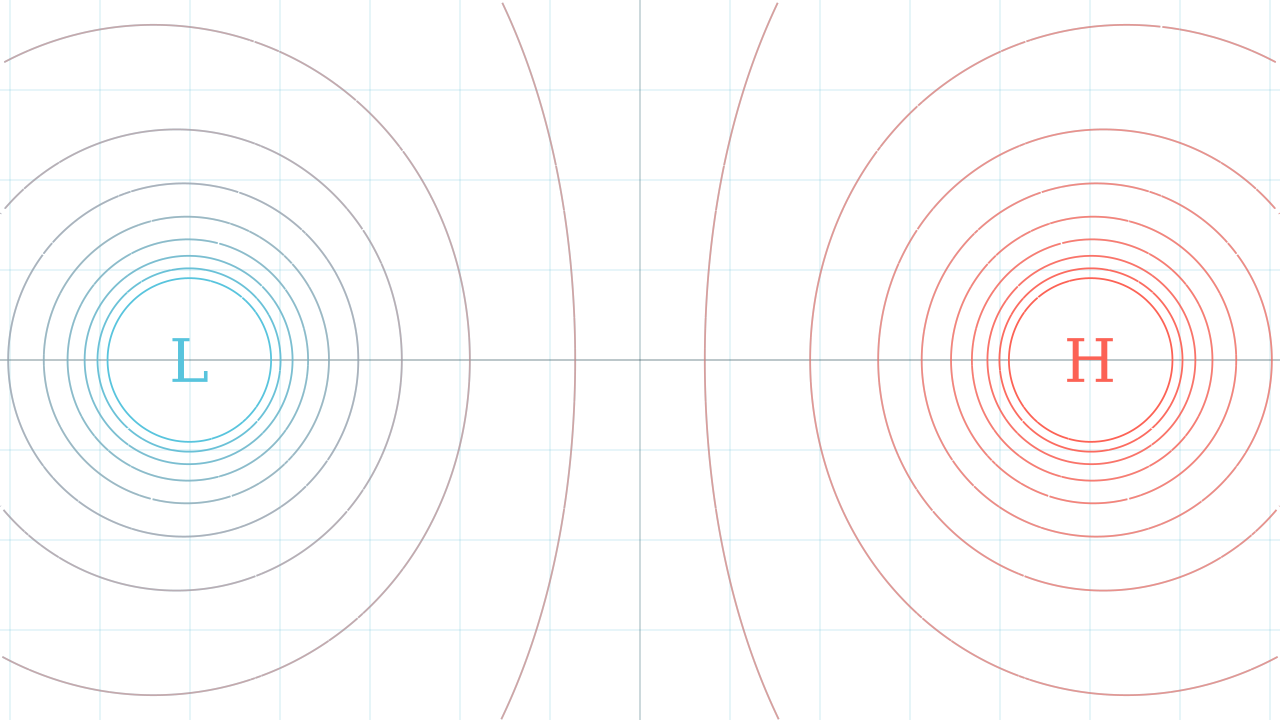

In [26]:
%%capture_video --path "animations/coriolis/coriolis_air.mp4"
%%manim -qm --fps 60 $video_scene

class coriolis_Scene(ThreeDScene):
    def construct(self):
        self.camera.background_color = WHITE

        # npla = NumberPlane(x_axis_config = {"stroke_opacity": 0.215, "stroke_color": BLACK}, y_axis_config = {"stroke_opacity": 0.125, "stroke_color": BLACK}, background_line_style = {"stroke_opacity": 0.125})
        # self.add(npla)

        # air_pressure_field = Presuu
        # self.add(air_pressure_field)

        pressure_field = PressureField()
        self.add(pressure_field)

        isobars = pressure_field.get_isobars(isobaric_density = 17)
        self.add(isobars)